In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
production = pd.read_csv('../raw_data/GrossNetElecProd.csv', encoding = 'unicode_escape')
production.head()

,freq,plants,operator,nrg_bal,siec,unit,Alpha_2_code,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,A,CHP,PRR_AUTO,GEP,CF,GWH,AL,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,A,CHP,PRR_AUTO,GEP,CF,GWH,AT,3025000,3888000,4037000,...,5209027,4690911,4453396,4067491,4142426,4331098,4536887,4108578,4170416,4037880
2,A,CHP,PRR_AUTO,GEP,CF,GWH,BA,:,:,:,...,:,:,:,0.000,0.000,0.000,0.000,0.000,0.000,29000
3,A,CHP,PRR_AUTO,GEP,CF,GWH,BE,0.000,0.000,0.000,...,5441300,6023200,6161500,6429000,6476100,6820600,7589700,7728100,9114800,9366900
4,A,CHP,PRR_AUTO,GEP,CF,GWH,BG,3882000,2995000,3708000,...,124000,255000,251000,233000,360000,399000,583165,637454,636997,650121


In [3]:
production.nrg_bal.nunique()

4

In [4]:
production.describe()

,freq,plants,operator,nrg_bal,siec,unit,Alpha_2_code,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,14190,14190,14190,14190,14190,14190,14190,14190,14190,14190,...,14190,14190,14190,14190,14190,14190,14190,14190,14190,14190
unique,1,4,3,4,13,2,43,1237,1254,1330,...,2093,2121,2140,2199,2255,2282,2413,2436,2445,2363
top,A,TOTAL,PRR_AUTO,GEP,CF,GWH,AL,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
freq,14190,5074,4816,3741,1548,7482,330,9066,9048,8942,...,8331,8290,8556,9062,9027,8947,8890,8831,8815,8630


In [5]:
EU_countries = pd.DataFrame.from_dict([{'Belgium': 'BE', 'Bulgaria': 'BG', 'Czechia': 'CZ', 'Denmark': 'DK', 'Germany': 'DE', 'Estonia': 'EE', 'Ireland': 'IE', 'Greece': 'EL',
                'Spain': 'ES', 'France': 'FR', 'Croatia': 'HR', 'Italy': 'IT', 'Cyprus': 'CY', 'Latvia': 'LV', 'Lithuania': 'LT', 'Luxembourg': 'LU', 
                'Hungary': 'HU', 'Malta': 'MT', 'Netherlands': 'NL', 'Austria': 'AT', 'Poland': 'PL', 'Portugal': 'PT', 'Romania': 'RO', 'Slovenia': 'SI',
                'Slovakia': 'SK', 'Finland': 'FI', 'Sweden': 'SE'}])
EU_countries = EU_countries.T.reset_index()
EU_countries.rename(columns={'index': 'EU_country', 0: 'Alpha_2_code'}, inplace=True)
EU_countries.head(2)


,EU_country,Alpha_2_code
0,Belgium,BE
1,Bulgaria,BG


In [6]:
EU_countries.EU_country.nunique()

27

In [7]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14190 entries, 0 to 14189
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   freq          14190 non-null  object
 1   plants        14190 non-null  object
 2   operator      14190 non-null  object
 3   nrg_bal       14190 non-null  object
 4   siec          14190 non-null  object
 5   unit          14190 non-null  object
 6   Alpha_2_code  14190 non-null  object
 7   1990          14190 non-null  object
 8   1991          14190 non-null  object
 9   1992          14190 non-null  object
 10  1993          14190 non-null  object
 11  1994          14190 non-null  object
 12  1995          14190 non-null  object
 13  1996          14190 non-null  object
 14  1997          14190 non-null  object
 15  1998          14190 non-null  object
 16  1999          14190 non-null  object
 17  2000          14190 non-null  object
 18  2001          14190 non-null  object
 19  2002

In [8]:
production.Alpha_2_code.unique()

array(['AL', 'AT', 'BA', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EA19', 'EE',
       'EL', 'ES', 'EU27_2020', 'FI', 'FR', 'GE', 'HR', 'HU', 'IE', 'IS',
       'IT', 'LI', 'LT', 'LU', 'LV', 'MD', 'ME', 'MK', 'MT', 'NL', 'NO',
       'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UA', 'UK', 'XK'],
      dtype=object)

In [9]:
production.Alpha_2_code.nunique()

43

In [10]:
countries = pd.read_csv('../raw_data/countries_codes_and_coordinates.csv', encoding = 'unicode_escape')
countries.head()

,Country,Alpha_2_code,Alpha_3_code
0,Afghanistan,AF,AFG
1,Albania,AL,ALB
2,Algeria,DZ,DZA
3,American Samoa,AS,ASM
4,Andorra,AD,AND


In [11]:
countries.Country.nunique()

244

In [12]:
production = production.merge(countries, on='Alpha_2_code', how='left')
production['EU?'] = production['Alpha_2_code'].isin(EU_countries['Alpha_2_code'])
production.sample(10)

,freq,plants,operator,nrg_bal,siec,unit,Alpha_2_code,1990,1991,1992,...,2014,2015,2016,2017,2018,2019,2020,Country,Alpha_3_code,EU?
3714,A,CHP,TOTAL,NHP,E7000,TJ,GE,:,:,:,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Georgia,GEO,False
3241,A,CHP,TOTAL,GHP,TOTAL,TJ,GE,:,:,:,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Georgia,GEO,False
3464,A,CHP,TOTAL,NEP,RA200,GWH,LU,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Luxembourg,LUX,True
4894,A,ELC,PRR_AUTO,NEP,TOTAL,GWH,RS,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Serbia,SRB,False
3191,A,CHP,TOTAL,GHP,RA600,TJ,EA19,0.000,0.000,0.000,...,3000,0.000,0.000,14000,19000,53000,0.000,NaN,NaN,False
6,A,CHP,PRR_AUTO,GEP,CF,GWH,CZ,6627000,6426000,6396000,...,8441000,8566000,8738000,8395537,8166103,8043096,7276411,Czech Republic,CZE,True
13931,A,TOTAL,TOTAL,NHP,N9000,TJ,XK,:,:,:,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,False
546,A,CHP,PRR_AUTO,GHP,RA600,TJ,NL,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Netherlands,NLD,True
2549,A,CHP,PRR_MAIN,NHP,RA600,TJ,ES,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Spain,ESP,True
1078,A,CHP,PRR_AUTO,NHP,N9000,TJ,BE,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Belgium,BEL,True


In [13]:
energy_balance = pd.read_csv('../raw_data/Energy_Balance.csv', sep=':', encoding = 'unicode_escape' )
energy_balance.head()

,energy_balance,nrg_bal
0,Imports,IMP
1,Exports,EXP
2,Inlanddemand,ID
3,Transformationinput-electricityandheatgenerati...,TI_EHG_EDHP
4,Transformationinput-electricityandheatgenerati...,TI_EHG_EB


In [14]:
energy_balance.nrg_bal.unique()

array(['IMP', 'EXP', 'ID', 'TI_EHG_EDHP', 'TI_EHG_EB', 'TI_EHG_EPS_PURE',
       'TI_EHG_EPS_MIX', 'NRG_E', 'NRG_EHG_E', 'NRG_CM_E', 'NRG_OIL_NG_E',
       'NRG_PF_E', 'NRG_CO_E', 'NRG_BKBPB_E', 'NRG_GW_E', 'NRG_BF_E',
       '[NRG_PR_E]', 'NRG_NI_E', 'NRG_CL_E', 'NRG_LNG_E', 'NRG_BIOG_E',
       'NRG_GTL_E', 'NRG_CPP_E', 'NRG_NSP_E', 'DL', 'AFC', 'FC',
       'FC_IND_E', 'FC_IND_IS_E', 'FC_IND_CPC_E', 'FC_IND_NFM_E',
       'FC_IND_NMM_E', 'FC_IND_TE_E', 'FC_IND_MAC_E', 'FC_IND_MQ_E',
       'FC_IND_FBT_E', 'FC_IND_PPP_E', 'FC_IND_WP_E', 'FC_IND_CON_E',
       'FC_IND_TL_E', 'FC_IND_NSP_E', 'FC_TRA_E', 'FC_TRA_RAIL_E',
       'FC_TRA_ROAD_E', 'FC_TRA_PIPE_E', 'FC_TRA_NSP_E', 'FC_OTH_CP_E',
       'FC_OTH_HH_E', 'FC_OTH_AF_E', 'FC_OTH_FISH_E', 'FC_OTH_NSP_E',
       'STATDIFF', 'GEP', 'NEP'], dtype=object)

In [15]:
energy_balance.energy_balance.nunique()

54

In [16]:
production = production[['freq', 'plants', 'operator', 'nrg_bal', 'unit', 'Country', 'EU?', 'Alpha_2_code', 'Alpha_3_code',
                           '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
                           '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
                           '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
                           '2017', '2018', '2019', '2020']]
production.head()

,freq,plants,operator,nrg_bal,unit,Country,EU?,Alpha_2_code,Alpha_3_code,1990,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,A,CHP,PRR_AUTO,GEP,GWH,Albania,False,AL,ALB,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,A,CHP,PRR_AUTO,GEP,GWH,Austria,True,AT,AUT,3025000,...,5209027,4690911,4453396,4067491,4142426,4331098,4536887,4108578,4170416,4037880
2,A,CHP,PRR_AUTO,GEP,GWH,Bosnia and Herzegovina,False,BA,BIH,:,...,:,:,:,0.000,0.000,0.000,0.000,0.000,0.000,29000
3,A,CHP,PRR_AUTO,GEP,GWH,Belgium,True,BE,BEL,0.000,...,5441300,6023200,6161500,6429000,6476100,6820600,7589700,7728100,9114800,9366900
4,A,CHP,PRR_AUTO,GEP,GWH,Bulgaria,True,BG,BGR,3882000,...,124000,255000,251000,233000,360000,399000,583165,637454,636997,650121


In [17]:
EU_production = production.loc[production['EU?'] == True]
EU_production

,freq,plants,operator,nrg_bal,unit,Country,EU?,Alpha_2_code,Alpha_3_code,1990,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,A,CHP,PRR_AUTO,GEP,GWH,Austria,True,AT,AUT,3025000,...,5209027,4690911,4453396,4067491,4142426,4331098,4536887,4108578,4170416,4037880
3,A,CHP,PRR_AUTO,GEP,GWH,Belgium,True,BE,BEL,0.000,...,5441300,6023200,6161500,6429000,6476100,6820600,7589700,7728100,9114800,9366900
4,A,CHP,PRR_AUTO,GEP,GWH,Bulgaria,True,BG,BGR,3882000,...,124000,255000,251000,233000,360000,399000,583165,637454,636997,650121
5,A,CHP,PRR_AUTO,GEP,GWH,Cyprus,True,CY,CYP,0.000,...,50000,49000,45000,38000,37000,38000,40524,43707,43736,45608
6,A,CHP,PRR_AUTO,GEP,GWH,Czech Republic,True,CZ,CZE,6627000,...,7260000,7334000,7956000,8441000,8566000,8738000,8395537,8166103,8043096,7276411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14180,A,TOTAL,TOTAL,NHP,TJ,Portugal,True,PT,PRT,0.000,...,44000,55000,46000,55000,87000,0.000,0.000,0.000,0.000,0.000
14181,A,TOTAL,TOTAL,NHP,TJ,Romania,True,RO,ROU,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14183,A,TOTAL,TOTAL,NHP,TJ,Sweden,True,SE,SWE,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14184,A,TOTAL,TOTAL,NHP,TJ,Slovenia,True,SI,SVN,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [18]:
EU_production.shape, production.shape

((8910, 40), (14190, 40))

In [19]:
production.plants.unique()

array(['CHP', 'ELC', 'HEAT', 'TOTAL'], dtype=object)

In [20]:
production.operator.unique()

array(['PRR_AUTO', 'PRR_MAIN', 'TOTAL'], dtype=object)

In [21]:
EU_production_annual = EU_production.loc[EU_production['operator'] == 'TOTAL']
EU_production_annual

,freq,plants,operator,nrg_bal,unit,Country,EU?,Alpha_2_code,Alpha_3_code,1990,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2667,A,CHP,TOTAL,GEP,GWH,Austria,True,AT,AUT,8651000,...,10820883,10740562,9884666,8652380,8991979,10608317,9619195,9645089,9951487,9844045
2669,A,CHP,TOTAL,GEP,GWH,Belgium,True,BE,BEL,7316000,...,14456300,15337600,14567000,13473900,14572000,15034700,14995300,15578500,15732400,16356800
2670,A,CHP,TOTAL,GEP,GWH,Bulgaria,True,BG,BGR,11267000,...,4672000,4984000,5171000,5110000,3954000,3903000,3801011,3843730,5229469,5337851
2671,A,CHP,TOTAL,GEP,GWH,Cyprus,True,CY,CYP,0.000,...,60000,58000,57000,51000,51000,52000,55450,57982,57920,60639
2672,A,CHP,TOTAL,GEP,GWH,Czech Republic,True,CZ,CZE,11247000,...,16268835,16628329,17559147,17007494,17060418,17017068,16586833,16016339,15748713,15960977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14180,A,TOTAL,TOTAL,NHP,TJ,Portugal,True,PT,PRT,0.000,...,44000,55000,46000,55000,87000,0.000,0.000,0.000,0.000,0.000
14181,A,TOTAL,TOTAL,NHP,TJ,Romania,True,RO,ROU,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14183,A,TOTAL,TOTAL,NHP,TJ,Sweden,True,SE,SWE,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14184,A,TOTAL,TOTAL,NHP,TJ,Slovenia,True,SI,SVN,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [22]:
EU_production_annual.shape

(3024, 40)

In [23]:
columns = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

In [24]:
# EU_production_annual[columns]= pd.to_numeric(EU_production_annual[columns], errors = 'coerce')

In [25]:
EU_production_annual[columns]= EU_production_annual[columns].apply(pd.to_numeric, errors = 'coerce')

/var/folders/bb/d2nrtjg13jv6cd6m6k1c7s8m0000gn/T/ipykernel_18760/918850703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EU_production_annual[columns]= EU_production_annual[columns].apply(pd.to_numeric, errors = 'coerce')


In [26]:
EU_production_annual.dtypes

freq             object
plants           object
operator         object
nrg_bal          object
unit             object
Country          object
EU?                bool
Alpha_2_code     object
Alpha_3_code     object
1990            float64
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
dtype: object

In [27]:
EU_production_annual

,freq,plants,operator,nrg_bal,unit,Country,EU?,Alpha_2_code,Alpha_3_code,1990,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2667,A,CHP,TOTAL,GEP,GWH,Austria,True,AT,AUT,8651000.0,...,10820883.0,10740562.0,9884666.0,8652380.0,8991979.0,10608317.0,9619195.0,9645089.0,9951487.0,9844045.0
2669,A,CHP,TOTAL,GEP,GWH,Belgium,True,BE,BEL,7316000.0,...,14456300.0,15337600.0,14567000.0,13473900.0,14572000.0,15034700.0,14995300.0,15578500.0,15732400.0,16356800.0
2670,A,CHP,TOTAL,GEP,GWH,Bulgaria,True,BG,BGR,11267000.0,...,4672000.0,4984000.0,5171000.0,5110000.0,3954000.0,3903000.0,3801011.0,3843730.0,5229469.0,5337851.0
2671,A,CHP,TOTAL,GEP,GWH,Cyprus,True,CY,CYP,0.0,...,60000.0,58000.0,57000.0,51000.0,51000.0,52000.0,55450.0,57982.0,57920.0,60639.0
2672,A,CHP,TOTAL,GEP,GWH,Czech Republic,True,CZ,CZE,11247000.0,...,16268835.0,16628329.0,17559147.0,17007494.0,17060418.0,17017068.0,16586833.0,16016339.0,15748713.0,15960977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14180,A,TOTAL,TOTAL,NHP,TJ,Portugal,True,PT,PRT,0.0,...,44000.0,55000.0,46000.0,55000.0,87000.0,0.0,0.0,0.0,0.0,0.0
14181,A,TOTAL,TOTAL,NHP,TJ,Romania,True,RO,ROU,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14183,A,TOTAL,TOTAL,NHP,TJ,Sweden,True,SE,SWE,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14184,A,TOTAL,TOTAL,NHP,TJ,Slovenia,True,SI,SVN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
EU_production_1990 = EU_production_annual['1990'].sum()
EU_production_1990

38531066487.68

In [29]:
EU_production_annual.loc['EU_Total'] = EU_production_annual[columns].sum()

/var/folders/bb/d2nrtjg13jv6cd6m6k1c7s8m0000gn/T/ipykernel_18760/1449393238.py:1: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  EU_production_annual.loc['EU_Total'] = EU_production_annual[columns].sum()
/var/folders/bb/d2nrtjg13jv6cd6m6k1c7s8m0000gn/T/ipykernel_18760/1449393238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EU_production_annual.loc['EU_Total'] = EU_production_annual[columns].sum()


In [30]:
EU_production_annual

,freq,plants,operator,nrg_bal,unit,Country,EU?,Alpha_2_code,Alpha_3_code,1990,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2667,A,CHP,TOTAL,GEP,GWH,Austria,1.0,AT,AUT,8.651000e+06,...,1.082088e+07,1.074056e+07,9.884666e+06,8.652380e+06,8.991979e+06,1.060832e+07,9.619195e+06,9.645089e+06,9.951487e+06,9.844045e+06
2669,A,CHP,TOTAL,GEP,GWH,Belgium,1.0,BE,BEL,7.316000e+06,...,1.445630e+07,1.533760e+07,1.456700e+07,1.347390e+07,1.457200e+07,1.503470e+07,1.499530e+07,1.557850e+07,1.573240e+07,1.635680e+07
2670,A,CHP,TOTAL,GEP,GWH,Bulgaria,1.0,BG,BGR,1.126700e+07,...,4.672000e+06,4.984000e+06,5.171000e+06,5.110000e+06,3.954000e+06,3.903000e+06,3.801011e+06,3.843730e+06,5.229469e+06,5.337851e+06
2671,A,CHP,TOTAL,GEP,GWH,Cyprus,1.0,CY,CYP,0.000000e+00,...,6.000000e+04,5.800000e+04,5.700000e+04,5.100000e+04,5.100000e+04,5.200000e+04,5.545000e+04,5.798200e+04,5.792000e+04,6.063900e+04
2672,A,CHP,TOTAL,GEP,GWH,Czech Republic,1.0,CZ,CZE,1.124700e+07,...,1.626884e+07,1.662833e+07,1.755915e+07,1.700749e+07,1.706042e+07,1.701707e+07,1.658683e+07,1.601634e+07,1.574871e+07,1.596098e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14181,A,TOTAL,TOTAL,NHP,TJ,Romania,1.0,RO,ROU,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
14183,A,TOTAL,TOTAL,NHP,TJ,Sweden,1.0,SE,SWE,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
14184,A,TOTAL,TOTAL,NHP,TJ,Slovenia,1.0,SI,SVN,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
14185,A,TOTAL,TOTAL,NHP,TJ,Slovakia,1.0,SK,SVK,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [31]:
y = EU_production_annual.loc['EU_Total']

ValueError: x and y must have same first dimension, but have shapes (31,) and (40,)

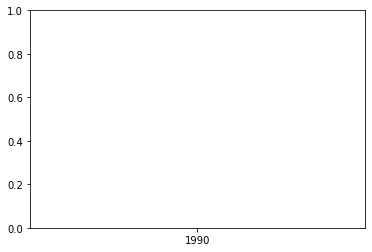

In [32]:
X = columns
plt.plot(X, y)

In [ ]:
# EU_production_annual_total = EU_production.sum(axis=1, numeric_only=True)
# EU_production_annual_total